# PANDAS

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(np.random.randint(0,100, size = (10, 4)), index = range(0, 20, 2),
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,74,65,24,55
2,30,17,45,41
4,47,58,78,22
6,33,19,68,95
8,97,8,38,14
10,46,95,29,16
12,64,25,96,51
14,70,80,87,32
16,50,64,27,13
18,42,15,88,62


In [5]:
df.describe() #descrive le colonne
# df.T.describe() descrive le righe

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,55.300000,44.600000,58.000000,40.100000
std,20.758131,31.238153,28.307832,26.299345
min,30.000000,8.000000,24.000000,13.000000
25%,43.000000,17.500000,31.250000,17.500000
50%,48.500000,41.500000,56.500000,36.500000
75%,68.500000,64.750000,84.750000,54.000000
max,97.000000,95.000000,96.000000,95.000000


<AxesSubplot:>

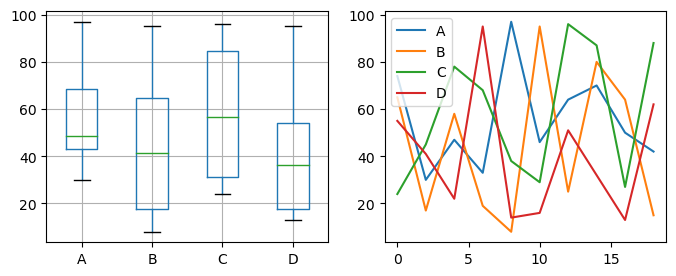

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))

df.boxplot(ax = ax[0]) 
df.plot(ax = ax[1]) 

In [11]:
#ordinare per indici (riga o colonna)
df.sort_index(axis = 0, ascending = False) #axis = 0 ordino per riga, axis = 1 per colonna

,A,B,C,D
18,42,15,88,62
16,50,64,27,13
14,70,80,87,32
12,64,25,96,51
10,46,95,29,16
8,97,8,38,14
6,33,19,68,95
4,47,58,78,22
2,30,17,45,41
0,74,65,24,55


In [12]:
# Ordinare per valori
df.sort_values(by = ['A', 'B'],
               ascending = False, inplace = False)

#sort values non ordina il df iniziale, ma ne produce uno nuovo ordinato.
# Io devo usare inplace per dirgli se mi deve sostituire il dataframe originale

,A,B,C,D
8,97,8,38,14
0,74,65,24,55
14,70,80,87,32
12,64,25,96,51
16,50,64,27,13
4,47,58,78,22
10,46,95,29,16
18,42,15,88,62
6,33,19,68,95
2,30,17,45,41


In [13]:
df['B']

0     65
2     17
4     58
6     19
8      8
10    95
12    25
14    80
16    64
18    15
Name: B, dtype: int32

In [18]:
df['B'] > 50

0      True
2     False
4      True
6     False
8     False
10     True
12    False
14     True
16     True
18    False
Name: B, dtype: bool

In [17]:
df[df['B'] > 50]

,A,B,C,D
0,74,65,24,55
4,47,58,78,22
10,46,95,29,16
14,70,80,87,32
16,50,64,27,13


In [19]:
df.fillna(value = 12)
# df.dropna(how = 'any')

,A,B,C,D
0,74,65,24,55
2,30,17,45,41
4,47,58,78,22
6,33,19,68,95
8,97,8,38,14
10,46,95,29,16
12,64,25,96,51
14,70,80,87,32
16,50,64,27,13
18,42,15,88,62


In [28]:
df = pd.read_csv(r"https://raw.githubusercontent.com/AndreMenta/mastercobra/main/data/us_elections.csv")
df[:5]

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK
3,Arizona,https://results.arizona.vote/#/featured/18/0,NaN,"3,400,000",NaN,65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699",NaN,AZ
4,Arkansas,https://results.enr.clarityelections.com/AR/10...,Unofficial,"1,212,030","1,206,697",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974",NaN,AR


In [27]:
df.dtypes
# notiamo che hanno tutti il tipo oggetto. Per esempio i numeri
# sono considerati oggetti e non numeri perchè in questo caso le migliaia sono
# separate con la virgola

State                                  object
Source                                 object
Official/Unofficial                    object
Total Ballots Counted (Estimate)       object
Vote for Highest Office (President)    object
VEP Turnout Rate                       object
Voting-Eligible Population (VEP)       object
Voting-Age Population (VAP)            object
% Non-citizen                          object
Prison                                 object
Probation                              object
Parole                                 object
Total Ineligible Felon                 object
Overseas Eligible                      object
State Abv                              object
dtype: object

#### Pulire i dati: conversione numeri

In [30]:
def thousands(x):
    if pd.isnull(x): #se è nullo mi restituisce il valore nullo
        return x
    else:
        try:
            return float(x.replace(',', '')) #se non è nullo mi prova a sostituire le virgole con nulla e le interpreta come float
        except ValueError:
            return np.nan

In [29]:
def perc(x):
    if pd.isnull(x): #se è nullo mi restituisce il valore nullo
        return x
    else:
        try:
            return float(x.replace('%', '')) / 100 #se non è nullo mi prova a sostituire le virgole con nulla e le interpreta come float
        except ValueError:
            return np.nan

In [31]:
conversion_map = {
    3:thousands, 6:thousands
}

In [34]:
df2 = pd.read_csv(r"https://raw.githubusercontent.com/AndreMenta/mastercobra/main/data/us_elections.csv", 
                 converters = conversion_map)
df2.dtypes

State                                   object
Source                                  object
Official/Unofficial                     object
Total Ballots Counted (Estimate)       float64
Vote for Highest Office (President)     object
VEP Turnout Rate                        object
Voting-Eligible Population (VEP)       float64
Voting-Age Population (VAP)             object
% Non-citizen                           object
Prison                                  object
Probation                               object
Parole                                  object
Total Ineligible Felon                  object
Overseas Eligible                       object
State Abv                               object
dtype: object

#### Conversione date

In [35]:
import datetime

In [ ]:
d = datetime.datetime.strptime(dst, '%a, %b %d')...